In [ ]:
# *****************************              SEABORN              *****************************

In [2]:
# Pandas
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
# 5.8. Contour - линии уровней
# Иногда приходится иметь дело с трехмерными поверхностями, т.е. результатом табулирования функции от двух переменных 'z = f(x, y)'.
# Сейчас, как правило, с восприятием таких графиков нет никаких проблем - есть много способов создать интерактивный
# трехмерный график, который можно вертеть и масштабировать как угодно. Но если мы говорим о статичной картинке,
# то с пониманием графика возникают некоторые трудности.
# Выход нашли еще до появления компьютеров, при издании технической литературы, который заключается в том что строят
# не трехмерный график а его отображение на плоскости. Это отображение получают по следующим правилам:
# берут заданное количество плоскостей параллельных плоскости xy и выделяют место пересечения поверхности с каждой
# из этих плоскостей - контуры, затем проецируют данные контуры на плоскость xy и все график готов.

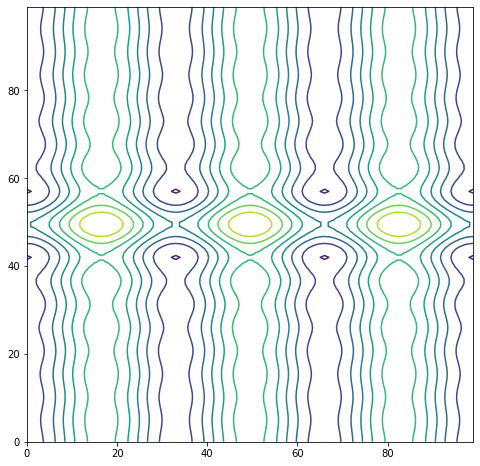

In [4]:
# Несколько примеров
# Давайте разберемся на примере какой нибудь реальной функции от двух переменных, скажем z = np.sinc(x) + np.cos(y):

# import numpy as np
# import matplotlib.pyplot as plt


x, y = np.mgrid[-3*np.pi:3*np.pi:100j,
                -3*np.pi:3*np.pi:100j]
z = np.sinc(x) + np.cos(y)

fig, ax = plt.subplots()

ax.contour(z)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

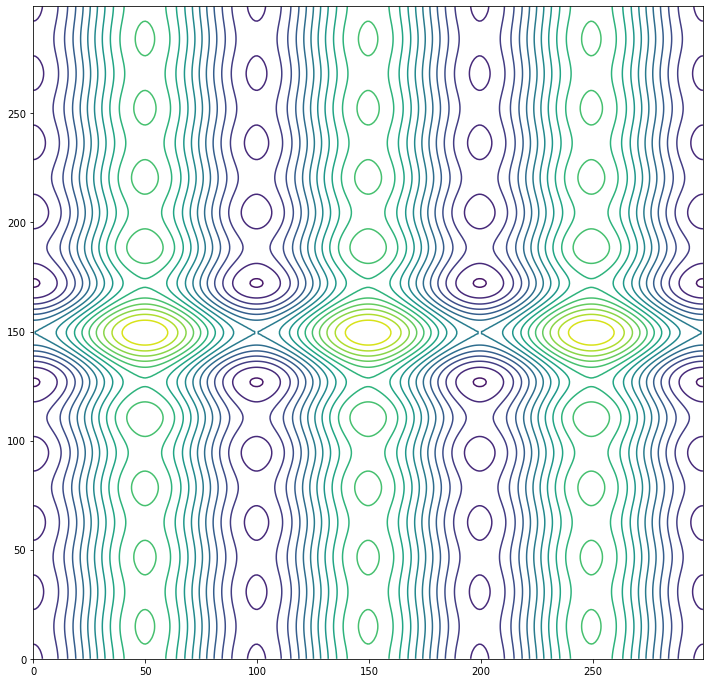

In [5]:
# Количество контуров можно увеличить с помощью параметра levels:

# import numpy as np
# import matplotlib.pyplot as plt


x, y = np.mgrid[-3*np.pi:3*np.pi:300j,
                -3*np.pi:3*np.pi:300j]
z = np.sinc(x) + np.cos(y)

fig, ax = plt.subplots()

ax.contour(z, levels = 20)

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(12)    #  высота "Figure"

plt.show()

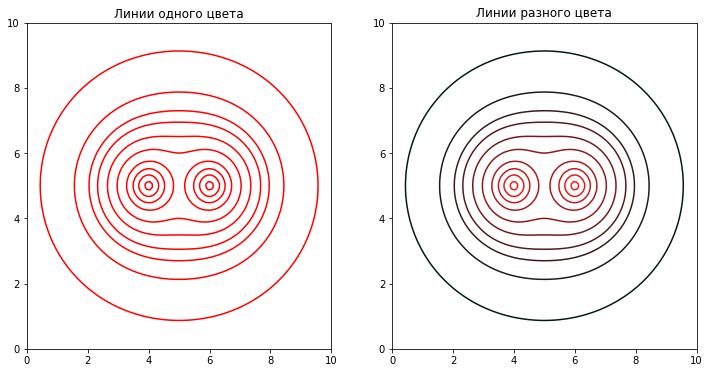

In [6]:
# Цвет линий
# Цвет линий определяется автоматически на основе, установленной по умолчанию, палитры.
# С помощью параметра colors мы можем задать один цвет для всех линий или, что очень важно для физиков и инженеров,
# цвет каждой линии. В случае, если необходимо определить цвет каждой линии, то параметру colors необходимо
# присвоить массив длинна которого соответствует количеству линий (levels) а каждый элемент определенному цвету.
# Давайте рассмотрим график напряженности электрического поля два электрических заряда:

# import numpy as np
# import matplotlib.pyplot as plt


x, y = np.mgrid[0:10:100j, 0:10:100j]

#  Вычисляем напряженность электрического
#  поля двух зарядов в каждой точке плоскости:
x_1, x_2, y_0 = 4, 6, 5
d = x_2 - x_1
r_1 = np.sqrt((x - x_1)**2 + (y - y_0)**2)
r_2 = np.sqrt((x - x_2)**2 + (y - y_0)**2)
a = (d**2 - r_1**2 - r_2**2)/(2*r_1*r_2)
E_1 = 1/(r_1**2)
E_2 = 1/(r_2**2)
E = 10*np.sqrt(E_1**2 + E_2**2 + 2*E_1*E_2*np.cos(a))

fig, axes = plt.subplots(1, 2)

#  Задаем значение каждого уровня:
lev = [1, 2, 3, 4, 6, 10, 20, 40, 100, 900]

#  Контуры одного цвета:
axes[0].contour(x, y, E, levels = lev,
           colors = 'r')
axes[0].set_title('Линии одного цвета')

#  Создаем массив RGB цветов каждого уровня:
color_line = np.zeros((10, 3))
color_line[:, 1:] = 0.1
color_line[:, 0] = np.linspace(0, 1, 10)

#  Контуры разного цвета:
axes[1].contour(x, y, E, levels = lev,
           colors = color_line)
axes[1].set_title('Линии разного цвета')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

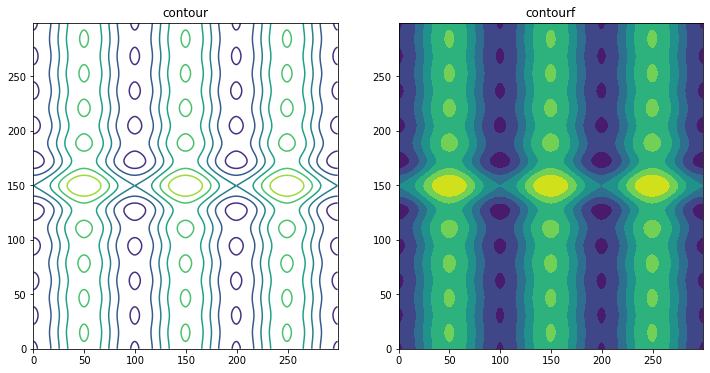

In [7]:
# Contourf - область между контурами
# Если области между контурами будут заполнены разными цветами то мы добьемся того же самого результата.
# Метод contourf выделяет контуры не линиями, а цветом областей между ними:

# import numpy as np
# import matplotlib.pyplot as plt


x, y = np.mgrid[-3*np.pi:3*np.pi:300j,
                -3*np.pi:3*np.pi:300j]
z = np.sinc(x) + np.cos(y)

fig, axes = plt.subplots(1, 2)

axes[0].contour(z)
axes[0].set_title('contour')

axes[1].contourf(z)
axes[1].set_title('contourf')

fig.set_figwidth(12)    #  ширина и
fig.set_figheight(6)    #  высота "Figure"

plt.show()

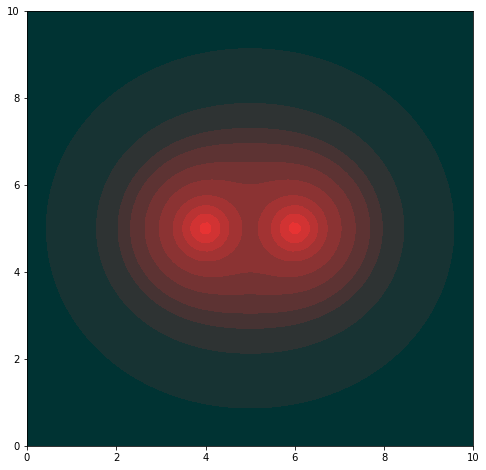

In [8]:
# Так же как и с contour мы можем задавать количество уровней и их цвет с помощью параметров levels и colors:

# import numpy as np
# import matplotlib.pyplot as plt


x, y = np.mgrid[0:10:100j, 0:10:100j]

x_1, x_2, y_0 = 4, 6, 5
d = x_2 - x_1
r_1 = np.sqrt((x - x_1)**2 + (y - y_0)**2)
r_2 = np.sqrt((x - x_2)**2 + (y - y_0)**2)
a = (d**2 - r_1**2 - r_2**2)/(2*r_1*r_2)
E_1 = 1/(r_1**2)
E_2 = 1/(r_2**2)
E = 10*np.sqrt(E_1**2 + E_2**2 + 2*E_1*E_2*np.cos(a))

fig, ax = plt.subplots()

#  Задаем значение каждого уровня:
lev = [0, 1, 2, 3, 4, 6, 10, 20, 40, 100, 900, 10000]

#  Создаем массив RGB цветов каждой области:
color_region = np.zeros((12, 3))
color_region[:, 1:] = 0.2
color_region[:, 0] = np.linspace(0, 1, 12)

ax.contourf(x, y, E,
            levels = lev,
            colors = color_region)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

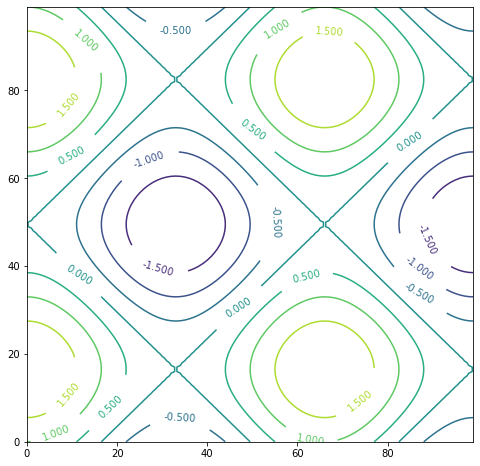

In [9]:
# clabel - метки контуров
# Каждому контуру соответствует определенное значение величины.
# Отобразить это значение в виде меток можно с помощью метода clabel.
# В самом простом случае, данный метод принимает всего один аргумент - объект ContourSet, возвращаемый методом contour:

# import numpy as np
# import matplotlib.pyplot as plt


x, y = np.mgrid[0:3*np.pi:100j,
                0:3*np.pi:100j]
z = np.sin(x) + np.cos(y)

fig, ax = plt.subplots()

cs = ax.contour(z)

ax.clabel(cs)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

In [10]:
# Однако, если тоже самое попробовать сделать с областями между контурами (contourf), то ничего не получится.
# Точнее получится, но будет выглядеть вот так:

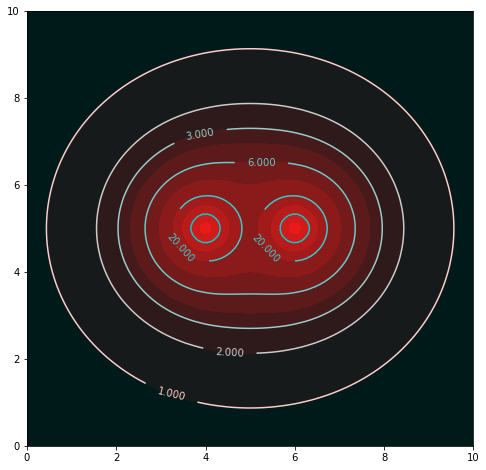

In [11]:
# В данном случае необходимо построить contourf и contour на одной области Axes,
# а уже потом строить clabel с объектом ContourSet, который вернет contour:

# import numpy as np
# import matplotlib.pyplot as plt


x, y = np.mgrid[0:10:100j, 0:10:100j]

x_1, x_2, y_0 = 4, 6, 5
d = x_2 - x_1
r_1 = np.sqrt((x - x_1)**2 + (y - y_0)**2)
r_2 = np.sqrt((x - x_2)**2 + (y - y_0)**2)
a = (d**2 - r_1**2 - r_2**2)/(2*r_1*r_2)
E_1 = 1/(r_1**2)
E_2 = 1/(r_2**2)
E = 10*np.sqrt(E_1**2 + E_2**2 + 2*E_1*E_2*np.cos(a))

fig, ax = plt.subplots()

###  Строим contourf  ###
#  Задаем количество областей:
lev_region = [0, 1, 2, 3, 4, 6, 10, 20, 40, 100, 900, 10000]
#  Задаем цвет каждой области:
color_fill = np.zeros((12, 3))
color_fill[:, 1:] = 0.1
color_fill[:, 0] = np.linspace(0, 1, 12)

ax.contourf(x, y, E,
            levels = lev_region,
            colors = color_fill)

###  Строим contour  ###
#  Задаем количество линий:
lev_line = [1, 2, 3, 6, 20, 100]
#  Задаем цвет линий:
color_line = np.zeros((6, 3))
color_line[:, 1:] = 0.8
color_line[:, 0] = np.linspace(1, 0, 6)

CS = ax.contour(x, y, E,
                levels = lev_line,
                colors = color_line)

ax.clabel(CS)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

In [12]:
# Обратите внимание на то, что количество областей и линий в contourf и contour не совпадает -
# это позволяет определять какие уровни помечать меткой а какие нет.

In [ ]:
# 5.9. Pcolormesh - псевдоцветная сетка
# Мы уже видели, что с помощью метода imshow можно отображать двумерные массивы в виде изображений.
# Однако, иногда возникает необходимость не отображать определенные ячейки (пиксели) или сделать так что
# бы ячейки были разного размера.
# Так же иногда необходимо отображать саму границу между ячейками. Для таких нужд нам и пригодится метод pcolormesh.

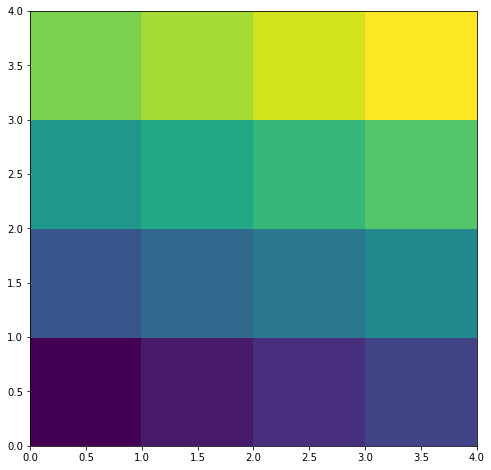

In [13]:
# Несколько примеров
# В самом простом случае метод pcolormesh принимает всего один аргумент - двумерный массив чисел:

# import numpy as np
# import matplotlib.pyplot as plt

c = [[ 0, 1, 2, 3],
     [ 4, 5, 6, 7],
     [ 8, 9, 10, 11],
     [12, 13, 14, 15]]

fig, ax = plt.subplots()

ax.pcolormesh(c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.show()

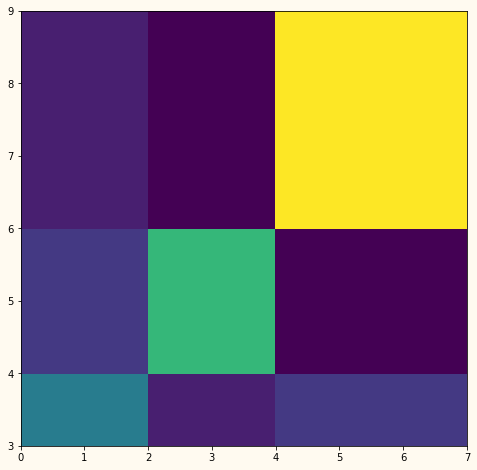

In [14]:
# Мы можем легко задавать размеры ячеек. Как это работает легче всего разобрать на графике с небольшим количеством ячеек:

# import numpy as np
# import matplotlib.pyplot as plt

c = [[5, 1, 2],
     [2, 8, 0],
     [1, 0, 12]]

x = [0, 2, 4, 7]
y = [3, 4, 6, 9]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

In [15]:
# В этом примере мы указали еще два параметра - массив x и массив y, которые на 1 больше длинны и ширины массива c.
# Эти массивы и задают ширину столбцов и высоту строк сетки и благодаря им можем записать координаты углов каждой ячейки,
# например, координаты самой левой нижней ячейки запишутся как:

#           (0, 4)           (2, 4)
#                 +---------+
#                 | c[2][0] |
#                 +---------+
#           (0, 3)           (2, 3)

In [ ]:
# Или в общем случае для каждой ячейки:

# (x[i+1, j], y[i+1, j])          (x[i+1, j+1], y[i+1, j+1])
#                       +--------+
#                       | c[i,j] |
#                       +--------+
#     (x[i, j], y[i, j])          (x[i, j+1], y[i, j+1])

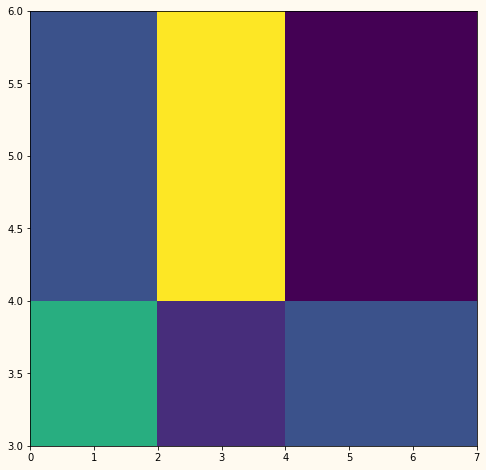

In [16]:
# Массивы x и y могут и совпадать с длинной и шириной массива c, но в этом случае последний столбец и последняя строка массива
# c будут игнорироваться:

# import numpy as np
# import matplotlib.pyplot as plt

c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

#  Длинна x и y совпадает с длиной
#  и шириной c:
x = [0, 2, 4, 7]
y = [3, 4, 6]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

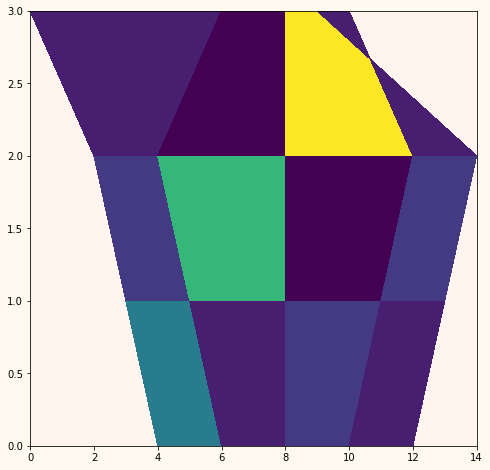

In [17]:
# Более того, ячейки даже не обязаны быть прямоугольными:

# import numpy as np
# import matplotlib.pyplot as plt

c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = [[4, 6, 8, 10, 12],
     [3, 5, 8, 11, 13],
     [2, 4, 8, 12, 14],
     [0, 6, 8, 10, 9]]

y = [0, 1, 2, 3]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

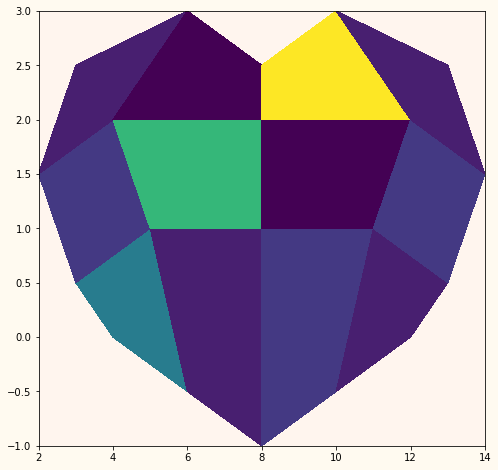

In [18]:
# И еще один пример, в котором ячейки имеют неправильную форму:

# import numpy as np
# import matplotlib.pyplot as plt

c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = [[4, 6, 8, 10, 12],
     [3, 5, 8, 11, 13],
     [2, 4, 8, 12, 14],
     [3, 6, 8, 10, 13]]

y = [[0,-0.5,-1,-0.5,0],
     [0.5,1,1,1,0.5],
     [1.5,2,2,2,1.5],
     [2.5,3,2.5,3,2.5]]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

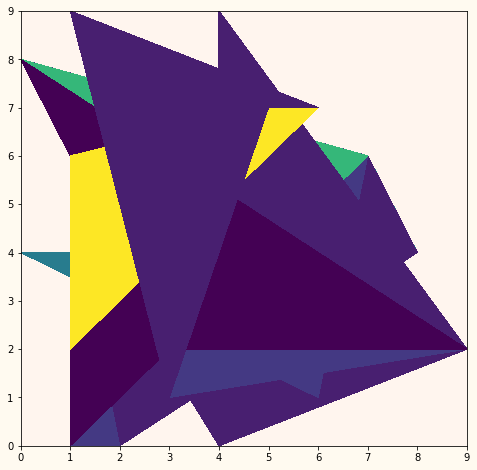

In [19]:
# Как видите, форму каждой ячейки мы задали сначала одним двумерным массивом x,
# а во втором случае с помощью двумерных массивов x и y.
# В первом примере видно, что ячейки могут даже перекрывать друг друга, т.е. фактически, единственное за чем нужно следить,
# так это за совместимостью размеров массивов x и y.
# Если их размеры совместимы, то само содержание массивов может быть каким угодно даже случайным:

# import numpy as np
# import matplotlib.pyplot as plt

c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = np.random.randint(0, 10, size = (4, 5))
y = np.random.randint(0, 10, size = (4, 5))

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

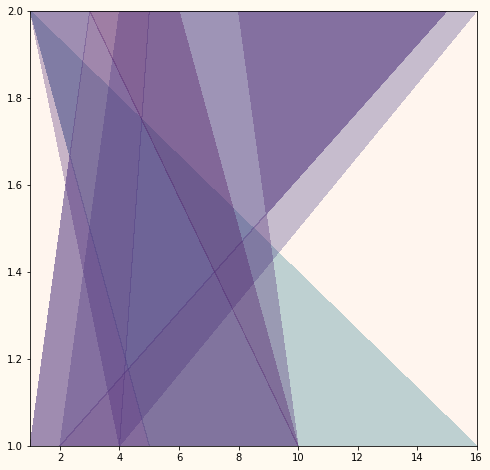

In [20]:
# Прозрачность
# В случае неравномерной сетки ячейки действительно могут перекрывать друг друга, в этом легко убедиться,
# если добавить параметр alpha, который задает прозрачность ячеек и может принимать значение из интервала [0, 1]:

# import numpy as np
# import matplotlib.pyplot as plt

c = [[5, 1, 2, 1],
     [2, 8, 0, 2],
     [1, 0, 12, 1]]

x = np.random.randint(1, 20, size = (4, 5))

y = np.random.randint(1, 3, size = (4, 5))

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c, alpha = 0.3)

fig.set_figwidth(8)    #  ширина и
fig.set_figheight(8)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()

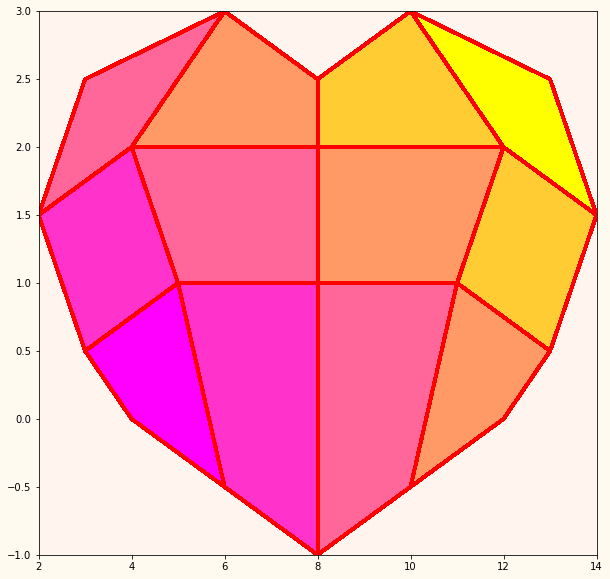

In [21]:
# Линии сетки
# Задать цвет линий сетки а так же их параметры можно с помощью множества параметров.
# Цвет задается параметром edgecolors, а их ширину с помощью параметра linewidth:

# import numpy as np
# import matplotlib.pyplot as plt

c = [[0, 1, 2, 3],
     [1, 2, 3, 4],
     [2, 3, 4, 5]]

x = [[4, 6, 8, 10, 12],
     [3, 5, 8, 11, 13],
     [2, 4, 8, 12, 14],
     [3, 6, 8, 10, 13]]

y = [[0,-0.5,-1,-0.5,0],
     [0.5,1,1,1,0.5],
     [1.5,2,2,2,1.5],
     [2.5,3,2.5,3,2.5]]

fig, ax = plt.subplots()

ax.pcolormesh(x, y, c,
              cmap = 'spring',
              edgecolors = 'r',
              linewidth = 3)

fig.set_figwidth(10)    #  ширина и
fig.set_figheight(10)    #  высота "Figure"
fig.set_facecolor('floralwhite')
ax.set_facecolor('seashell')

plt.show()